In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

### Calibration

In [2]:
path_n2 = ['/Users/blandt/Desktop/Rundowns/PH rundown August 2019/190503_n2_wt_tom9,50', 
       '/Users/blandt/Desktop/Rundowns/PH rundown August 2019/190529_n2_wt_tom9,50']
paths_n2 = direcslist(path_n2, 0)

<IPython.core.display.Javascript object>


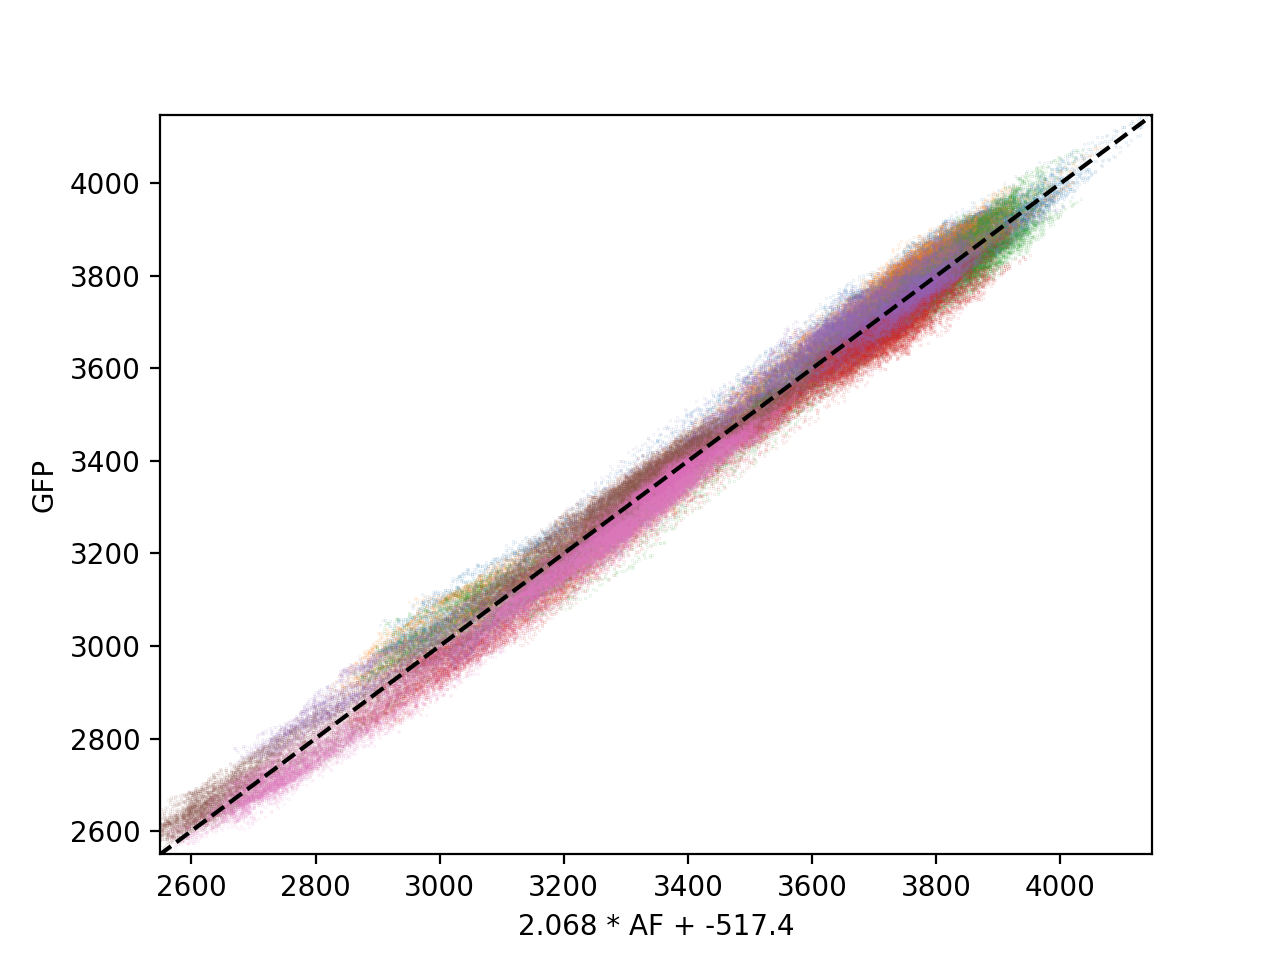

[2.068081794027049, -517.3918647972191]


In [5]:
af = AfCorrelation(paths_n2, gfp_regex='*488 SP 535-50 composite*', af_regex='*488 SP 630-75 composite*', 
                   sigma=2, expand=10, method='OLS')
af.run()
af.plot_prediction()
print(af.params)

### Correction

In [4]:
path = '/Users/blandt/Desktop/Rundowns/PH rundown August 2019'
paths = direcslist(path, 1)

for d in paths:
    ch1 = load_image(glob.glob(d + '/*488 SP 535-50 composite*')[0])
    ch2 = load_image(glob.glob(d + '/*488 SP 630-75 composite*')[0])
    img = af_subtraction(ch1, ch2, *af.params)
    save_img(img, d + '/af_corrected.tif')